In [1]:
# Importing Libraries

import pandas as pd

Data Source : https://www.mohfw.gov.in/

In [2]:
# Loading Data 

covid = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')

In [3]:
# Displaying top 5 rows
covid.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,156,3644,3436,52,147,3651,3452,52,35
1,1,Andhra Pradesh,81763,617776,530711,5302,78836,625514,541319,5359,28
2,3,Arunachal Pradesh,1957,7250,5280,13,1964,7385,5408,13,12
3,4,Assam,29362,155453,125543,548,28780,156680,127338,562,18
4,5,Bihar,12629,166788,153298,861,13005,169024,155155,864,10


In [4]:
# Displaying Last 5 rows
covid.tail()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
32,33,Tripura,6983,22032,14810,239,6566,22275,15464,245,16
33,35,Uttarakhand,12465,40085,27142,478,12455,40963,28017,491,05
34,36,Uttar Pradesh,66874,348517,276690,4953,65954,354275,283274,5047,09
35,37,West Bengal,24648,221960,193014,4298,24806,225137,195972,4359,19
36,11111,,1010824,5400619,4303043,86752,1003299,5487580,4396399,87882,


As we can see there is no use of the last row as its the total of each individual column and S.no. Therefore dropping those. 

In [5]:
covid = covid.iloc[:-1,1:]

In [6]:
# Displaying the first 5 rows
covid.head()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,Andaman and Nicobar Islands,156,3644,3436,52,147,3651,3452,52,35
1,Andhra Pradesh,81763,617776,530711,5302,78836,625514,541319,5359,28
2,Arunachal Pradesh,1957,7250,5280,13,1964,7385,5408,13,12
3,Assam,29362,155453,125543,548,28780,156680,127338,562,18
4,Bihar,12629,166788,153298,861,13005,169024,155155,864,10


In [7]:
# Displaying the last 5 rows
covid.tail()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
31,Telengana,30573,171306,139700,1033,29636,172608,141930,1042,36
32,Tripura,6983,22032,14810,239,6566,22275,15464,245,16
33,Uttarakhand,12465,40085,27142,478,12455,40963,28017,491,05
34,Uttar Pradesh,66874,348517,276690,4953,65954,354275,283274,5047,09
35,West Bengal,24648,221960,193014,4298,24806,225137,195972,4359,19


In [8]:
# Importing Library
import numpy as np

In [10]:
total_states = np.arange(len(covid['state_name']))

In [11]:
total_states

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [12]:
# Importing Library
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

### Total Positive Cases Based On States In India

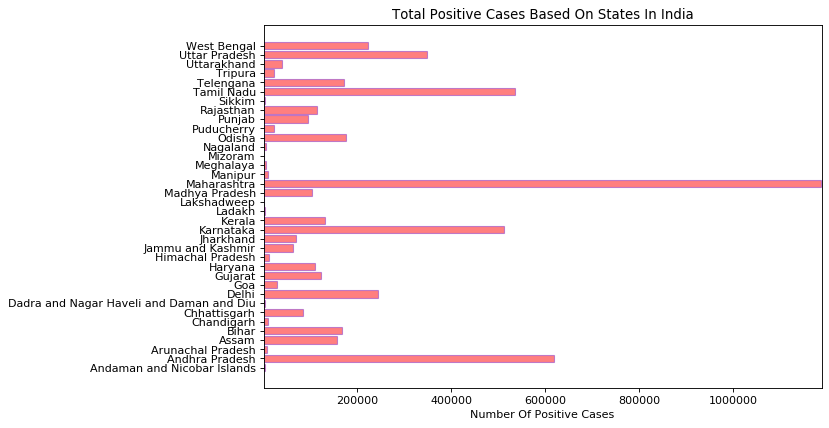

In [13]:
figure(num=None, figsize=(9,6), dpi=80, facecolor = 'w', edgecolor='k')
plt.barh(total_states, covid['positive'], align = 'center', alpha=0.5, color=(1,0,0),edgecolor = (0.5,0.2,0.8))
plt.yticks(total_states,covid['state_name'])
plt.xlim(1,max(covid['positive']+100))
plt.xlabel('Number Of Positive Cases')
plt.title('Total Positive Cases Based On States In India')
plt.show()


### Total Active Cases Based On States In India

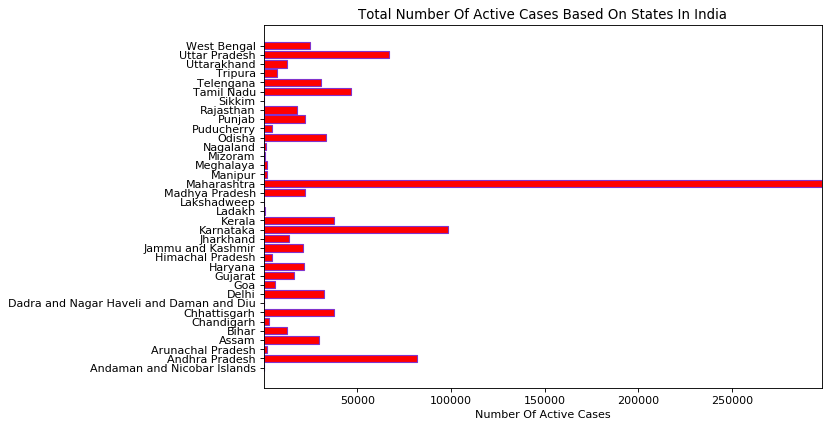

In [14]:
figure(num = None, figsize=(9,6), dpi=80, facecolor= 'w',edgecolor='k')
plt.barh(total_states,covid['active'],align='center', color = (1,0,0), edgecolor = (0.5,0.2,0.8))
plt.yticks(total_states,covid['state_name'])
plt.xlim(1,max(covid['active'])+10)
plt.xlabel('Number Of Active Cases')
plt.title('Total Number Of Active Cases Based On States In India')
plt.show()

In [15]:
covid.columns

Index(['state_name', 'active', 'positive', 'cured', 'death', 'new_active',
       'new_positive', 'new_cured', 'new_death', 'state_code'],
      dtype='object')

In [16]:
# Setting State Name as Index 
covid = covid.set_index('state_name',drop=True)

In [17]:
covid.head()

,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
state_name,,,,,,,,,
Andaman and Nicobar Islands,156,3644,3436,52,147,3651,3452,52,35
Andhra Pradesh,81763,617776,530711,5302,78836,625514,541319,5359,28
Arunachal Pradesh,1957,7250,5280,13,1964,7385,5408,13,12
Assam,29362,155453,125543,548,28780,156680,127338,562,18
Bihar,12629,166788,153298,861,13005,169024,155155,864,10


### Stack All The Columns In The Bar Chart

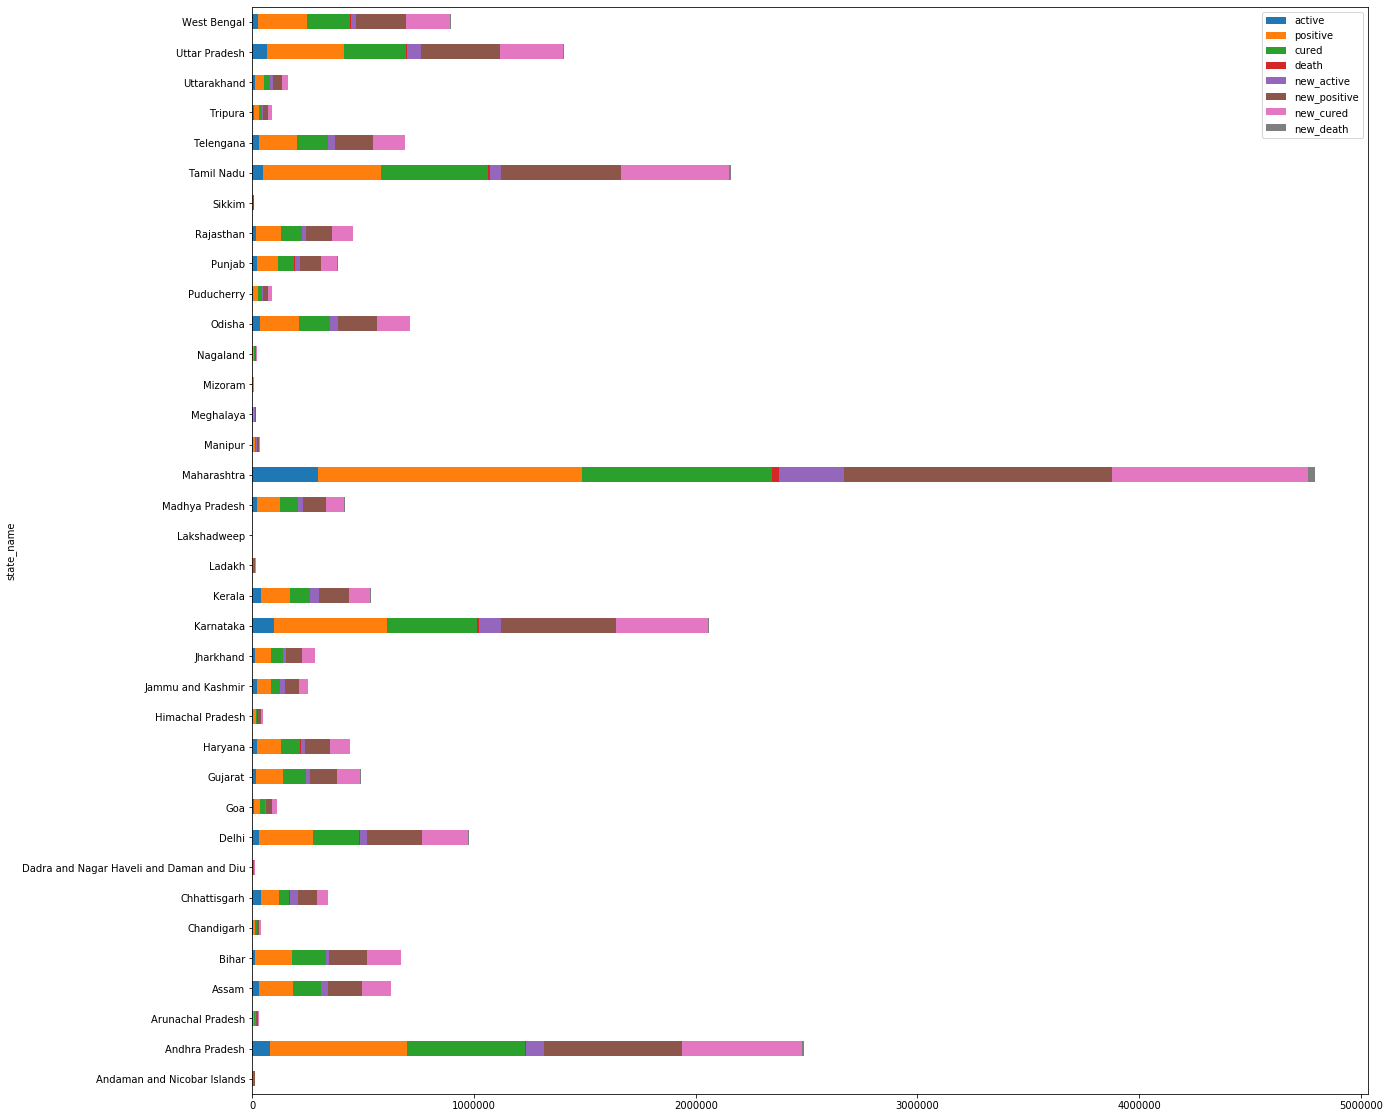

In [18]:
covid.plot.barh(stacked=True,figsize=(20,20))